/home/jose/entornos/amv/lib/python3.10/site-packages/matplotlib/animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


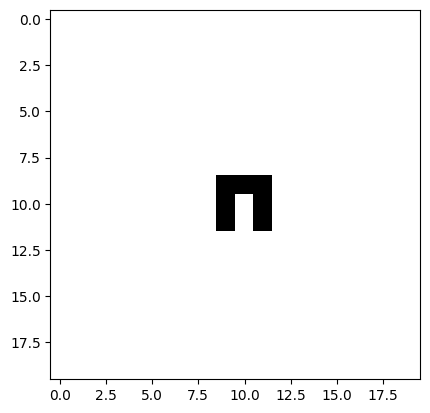

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Tamaño de la cuadrícula
GRID_SIZE = 20

# Crear una cuadrícula vacía
grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

# Definir las células vivas iniciales
initial_live_cells = [(9, 9), (9, 10), (9, 11), (10, 9), (10, 11), (11, 9), (11, 11)]

# Colocar las células vivas iniciales en la cuadrícula
for cell in initial_live_cells:
    grid[cell[0]][cell[1]] = 1

# Función para calcular el siguiente estado de la cuadrícula
def next_generation(curr_grid):
    new_grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)
    
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            # Contar el número de vecinos vivos
            live_neighbors = np.sum(curr_grid[max(0, i-1):min(i+2, GRID_SIZE), max(0, j-1):min(j+2, GRID_SIZE)]) - curr_grid[i][j]
            
            # Aplicar las reglas del juego de la vida
            if curr_grid[i][j] == 1 and (live_neighbors == 2 or live_neighbors == 3):
                new_grid[i][j] = 1
            elif curr_grid[i][j] == 0 and live_neighbors == 3:
                new_grid[i][j] = 1
    
    return new_grid

# Crear la figura de la animación
fig = plt.figure()

# Función para actualizar la cuadrícula en cada cuadro de la animación
def update_grid(frame_number):
    new_grid = next_generation(grid)
    img.set_array(new_grid)
    grid = new_grid

# Crear la animación
img = plt.imshow(grid, interpolation='nearest', cmap='binary')
ani = animation.FuncAnimation(fig, update_grid, frames=50, interval=200, repeat=True)

# Mostrar la animación
plt.show()
